In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

C:\Users\mahendra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\mahendra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\mahendra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# train and test data
train_data=pd.read_csv(r'C:\Users\mahendra\Desktop\analytics\projects\Janatahack Customer Segmentation\Train_aBjfeNk.csv')
test_data=pd.read_csv(r'C:\Users\mahendra\Desktop\analytics\projects\Janatahack Customer Segmentation\Test_LqhgPWU.csv')

In [3]:
train_data.shape,test_data.shape

((8068, 11), (2627, 10))

In [4]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       7928 non-null object
Age                8068 non-null int64
Graduated          7990 non-null object
Profession         7944 non-null object
Work_Experience    7239 non-null float64
Spending_Score     8068 non-null object
Family_Size        7733 non-null float64
Var_1              7992 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
train_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

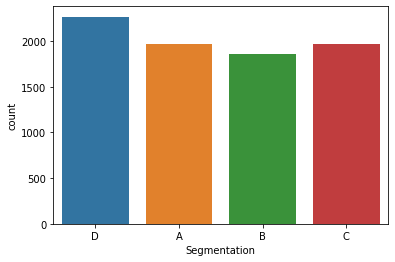

In [13]:
#distribution of traget variable
sns.countplot(train_data['Segmentation'])
train_data['Segmentation'].value_counts()

#### it is a balance classifiction problem

<AxesSubplot:xlabel='Gender', ylabel='count'>

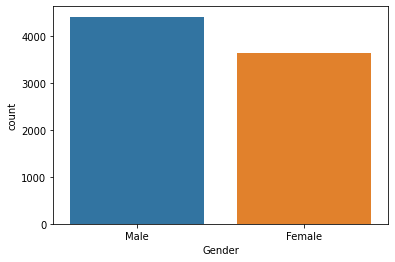

In [7]:
sns.countplot('Gender',data=train_data)

In [8]:
#encoding of gender column
train_data['Gender']=train_data['Gender'].replace(['Male','Female'],[2,1])
test_data['Gender']=test_data['Gender'].replace(['Male','Female'],[2,1])

<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

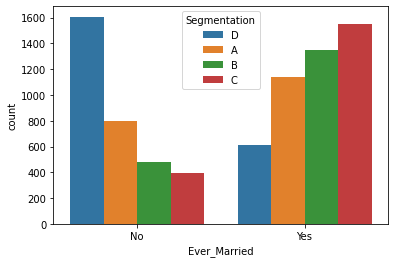

In [9]:
# checkig the Ever_Married distribution
sns.countplot('Ever_Married',hue='Segmentation',data=train_data)

In [10]:
train_data['Ever_Married']=train_data['Ever_Married'].fillna('unknown')
test_data['Ever_Married']=test_data['Ever_Married'].fillna('unknown')
#encoding of Ever_married column
train_data['Ever_Married']=train_data['Ever_Married'].replace(['No','unknown','Yes'],[1,2,3])
test_data['Ever_Married']=test_data['Ever_Married'].replace(['No','unknown','Yes'],[1,2,3])

In [19]:
#convert age in bins
train_data['Age']=pd.cut(train_data['Age'],bins=[10,20,30,40,50,60,70,80,90],labels=[15,25,35,45,55,65,75,85])
test_data['Age']=pd.cut(test_data['Age'],bins=[10,20,30,40,50,60,70,80,90],labels=[15,25,35,45,55,65,75,85])

train_data['Age']=train_data['Age'].astype('int')
test_data['Age']=test_data['Age'].astype('int')

<AxesSubplot:xlabel='Graduated', ylabel='count'>

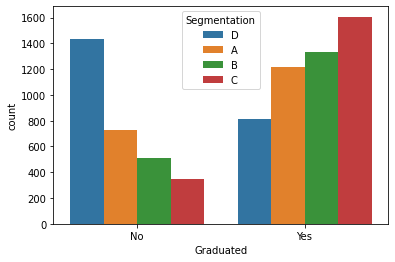

In [11]:
sns.countplot('Graduated',hue='Segmentation',data=train_data)

In [12]:
train_data['Graduated']=train_data['Graduated'].fillna('unknown')
test_data['Graduated']=test_data['Graduated'].fillna('unknown')
#encoding of Graduated column
train_data['Graduated']=train_data['Graduated'].replace(['No','unknown','Yes'],[3,2,1])
test_data['Graduated']=test_data['Graduated'].replace(['No','unknown','Yes'],[3,2,1])

<AxesSubplot:xlabel='Profession', ylabel='count'>

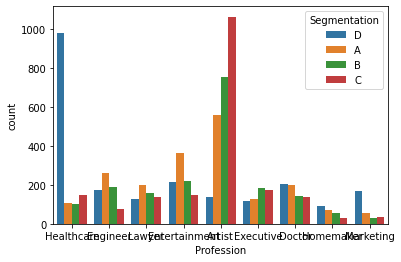

In [13]:
sns.countplot('Profession',hue='Segmentation',data=train_data)

In [14]:
train_data['Profession']=train_data['Profession'].fillna('Unkown')
train_data['Profession']=train_data['Profession'].astype('str')

test_data['Profession']=test_data['Profession'].fillna('Unkown')
test_data['Profession']=test_data['Profession'].astype('str')

le = preprocessing.LabelEncoder()
train_data['Profession']=le.fit_transform(train_data['Profession'])
test_data['Profession']=le.transform(test_data['Profession'])

In [15]:
train_data['Work_Experience']=train_data['Work_Experience'].fillna(999)
train_data['Work_Experience_given']=train_data['Work_Experience'].apply(lambda x:0 if x==999 else 1)
train_data['Work_Experience']=train_data['Work_Experience'].replace([999],[1])

test_data['Work_Experience']=test_data['Work_Experience'].fillna(999)
test_data['Work_Experience_given']=test_data['Work_Experience'].apply(lambda x:0 if x==999 else 1)
test_data['Work_Experience']=test_data['Work_Experience'].replace([999],[1])

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

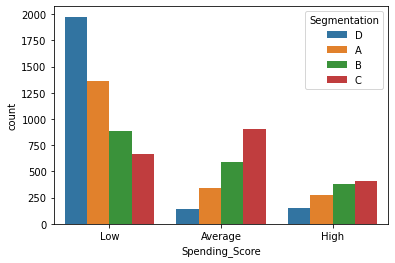

In [16]:
sns.countplot('Spending_Score',hue='Segmentation',data=train_data)

In [17]:
train_data['Spending_Score']=train_data['Spending_Score'].replace(['Low','Average','High'],[1,2,3])
test_data['Spending_Score']=test_data['Spending_Score'].replace(['Low','Average','High'],[1,2,3])

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

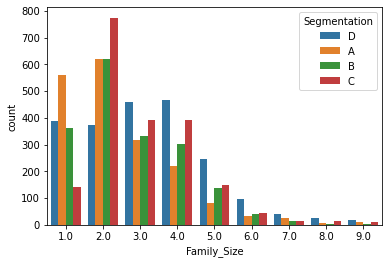

In [30]:
sns.countplot('Family_Size',hue='Segmentation',data=train_data)

In [18]:
train_data['Family_Size']=train_data['Family_Size'].fillna(2)
test_data['Family_Size']=test_data['Family_Size'].fillna(2)

<AxesSubplot:xlabel='Var_1', ylabel='count'>

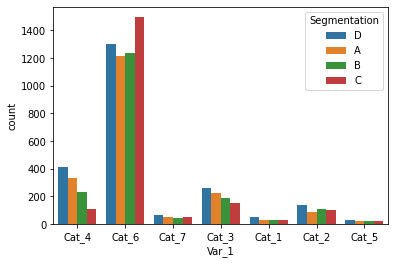

In [19]:
sns.countplot('Var_1',hue='Segmentation',data=train_data)

In [20]:
train_data['Var_1']=train_data['Var_1'].fillna('Cat_6')
train_data['Var_1']=train_data['Var_1'].replace(['Cat_7','Cat_6','Cat_5','Cat_4','Cat_3','Cat_2','Cat_1'],[7,6,5,4,3,2,1])

test_data['Var_1']=test_data['Var_1'].fillna('Cat_6')
test_data['Var_1']=test_data['Var_1'].replace(['Cat_7','Cat_6','Cat_5','Cat_4','Cat_3','Cat_2','Cat_1'],[7,6,5,4,3,2,1])

In [21]:
y=train_data.loc[:,'Segmentation']
x=train_data.drop(columns=['Segmentation'])

In [22]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit(x)
x1=st.transform(x)
test1=st.transform(test_data)

In [23]:
x2=pd.DataFrame(x1,columns=x.columns)
test2=pd.DataFrame(test1,columns=test_data.columns)

In [24]:
#split data into train test by sample size .2
X_train, X_test, y_train, y_test = train_test_split(x2,y, test_size=0.3)

In [34]:
from sklearn.model_selection import GridSearchCV

param_test2b = {
  'min_child_weight':[5,6],
  'max_depth': range(5,10,15),
  'n_estimators':[150,200,300,400],
  'scale_pos_weight':[1,2,3,4],
  'colsample_bytree':[0.7,0.8], 
  'subsample':[0.7,0.8],
  'gamma':[0,0.2,0.4]
    
}

gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=3,seed=27), 
 param_grid = param_test2b,n_jobs=4,iid=False, cv=5)


gsearch2b.fit(X_train, y_train)
print(gsearch2b.grid_scores_)
print("gsearch2b.best_params_",gsearch2b.best_params_)
print("gsearch2b.best_score_",gsearch2b.best_score_)

C:\Users\mahendra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[20:50:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [37]:
gsearch2b.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'max_depth': 5,
 'min_child_weight': 6,
 'n_estimators': 150,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [60]:
classifier = RandomForestClassifier(n_estimators=250, max_depth=5)
classifier.fit(x2,y)
pred1=classifier.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[291  83  88 114]
 [149 144 173  67]
 [ 84  74 343  92]
 [117  43  14 545]]
0.5464684014869888


In [59]:

xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=3,seed=27)
xgb_model.fit(x2,y)
pred1=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[21:12:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[417  60  43  56]
 [ 66 356  65  46]
 [ 39  37 465  52]
 [ 57  21   9 632]]
0.7724080958281702


In [58]:

lgb= LGBMClassifier(learning_rate=0.1, n_estimators=250, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=3,seed=27)
lgb.fit(x2,y)
pred1=lgb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[[391  64  55  66]
 [ 87 311  88  47]
 [ 43  47 445  58]
 [ 61  25  14 619]]
0.7294506402313093


In [61]:

estim=[('lgb',lgb),('classifier',classifier),('xgb_model',xgb_model)]
vt=VotingClassifier(estimators=estim,voting="hard")
vt.fit(x2,y)
pred1=vt.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test,pred1))

[21:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[400  58  48  70]
 [ 95 308  80  50]
 [ 47  37 450  59]
 [ 60  22  11 626]]
0.7368855844692276


In [62]:
pred=vt.predict(test2)
test_id=pd.read_csv(r'C:\Users\mahendra\Desktop\analytics\projects\Janatahack Customer Segmentation\Test_LqhgPWU.csv')
final_sub=test_id[['ID']]
final_sub['Segmentation']=pred

C:\Users\mahendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [63]:
com_id=np.intersect1d(train_data.ID,test_data.ID)

In [64]:
final_sub.set_index('ID',inplace=True)

In [65]:
final_sub.loc[com_id,'Segmentation']=np.array(train_data.set_index('ID').loc[com_id,'Segmentation'])

C:\Users\mahendra\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mahendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
final_sub.reset_index(inplace=True)

In [67]:
final_sub.to_csv(r'C:\Users\mahendra\Desktop\analytics\projects\Janatahack Customer Segmentation\final_s.csv',index=False)